In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## our own CART class
import cart

np.random.seed(seed=1)

In [2]:
hitters = pd.read_csv("data/Hitters.csv", usecols=['Years','Hits','Salary'])

In [3]:
hitters = hitters.dropna()

In [4]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hits    263 non-null    int64  
 1   Years   263 non-null    int64  
 2   Salary  263 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.2 KB


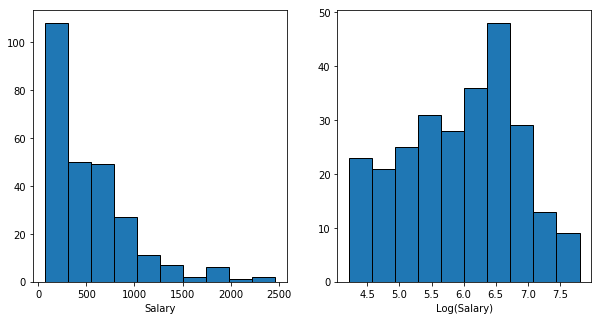

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.hist(hitters.Salary, ec='black')
ax1.set_xlabel('Salary')
ax2.hist(np.log(hitters.Salary), ec='black')
ax2.set_xlabel('Log(Salary)')
plt.show()

In [6]:
hitters['Salary'] = np.log(hitters['Salary']).round(1) ## Transform salary to Salary log
train_data, test_data = train_test_split(hitters, test_size = 0.1, random_state = 42) ## Split dataset

In [7]:
header = list(train_data.columns) ## Get column headers
train_data = train_data.values.tolist() ## Transform df to list of lists

In [8]:
depht = 2
clf = cart.CART(header,depht) ## Depht can also be omitted

In [9]:
clf.find_best_split(train_data)[1] ## Find the best question to ask

Years >= 4.0

In [10]:
my_tree = clf.fit(train_data) ## Fit our CART

In [11]:
clf.print_tree(my_tree)

 Years >= 4.0
 --> True:
   Hits >= 94.0
   --> True:
     Predict {7.5: '2%', 5.2: '0%', 6.4: '8%', 6.2: '4%', 6.8: '7%', 6.6: '12%', 5.0: '0%', 6.3: '6%', 6.7: '9%', 6.5: '3%', 7.8: '1%', 6.0: '3%', 4.5: '1%', 7.6: '2%', 4.6: '1%', 6.9: '7%', 7.2: '3%', 7.0: '1%', 7.1: '4%', 5.8: '1%', 7.4: '0%', 4.7: '0%', 5.9: '1%', 7.3: '1%', 5.6: '0%', 6.1: '1%', 5.3: '1%', 4.4: '0%'}
   --> False:
     Predict {6.1: '11%', 6.0: '7%', 5.2: '7%', 5.8: '5%', 5.7: '8%', 6.7: '2%', 6.2: '5%', 5.5: '14%', 4.9: '2%', 5.9: '5%', 6.3: '1%', 5.6: '2%', 6.6: '7%', 6.8: '1%', 7.0: '2%', 5.4: '4%', 7.2: '1%', 5.3: '2%', 4.7: '1%', 6.5: '2%', 6.4: '1%'}
 --> False:
   Hits >= 120.0
   --> True:
     Predict {5.2: '14%', 5.4: '14%', 5.1: '35%', 5.3: '21%', 6.2: '7%', 5.0: '7%'}
   --> False:
     Predict {4.5: '13%', 7.7: '2%', 4.6: '11%', 4.7: '11%', 4.9: '9%', 4.2: '16%', 4.8: '6%', 4.3: '11%', 6.8: '2%', 5.0: '6%', 5.4: '2%', 5.3: '2%', 5.7: '2%'}


In [12]:
test_data = test_data.values.tolist()

In [13]:
## Classification with test data
for row in test_data:
    print(f"Actual: {row[-1]}. Predicted: {clf.classify(row, my_tree)}")

Actual: 6.7. Predicted: 6.7
Actual: 5.6. Predicted: 6.7
Actual: 6.8. Predicted: 6.7
Actual: 5.0. Predicted: 6.7
Actual: 5.6. Predicted: 5.7
Actual: 5.6. Predicted: 5.7
Actual: 5.3. Predicted: 6.7
Actual: 4.9. Predicted: 6.2
Actual: 6.2. Predicted: 6.7
Actual: 5.8. Predicted: 5.7
Actual: 6.4. Predicted: 6.7
Actual: 6.7. Predicted: 6.7
Actual: 5.6. Predicted: 5.7
Actual: 5.0. Predicted: 6.2
Actual: 5.7. Predicted: 6.7
Actual: 6.6. Predicted: 6.7
Actual: 7.1. Predicted: 6.7
Actual: 4.6. Predicted: 4.9
Actual: 7.4. Predicted: 6.7
Actual: 6.2. Predicted: 6.7
Actual: 6.6. Predicted: 5.7
Actual: 5.9. Predicted: 6.2
Actual: 6.4. Predicted: 6.7
Actual: 6.3. Predicted: 6.7
Actual: 5.5. Predicted: 6.7
Actual: 4.5. Predicted: 4.9
Actual: 6.6. Predicted: 6.7


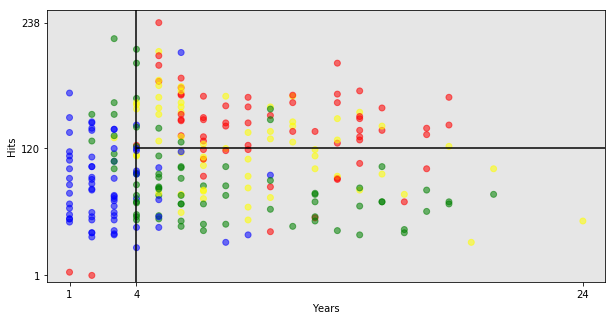

In [22]:
## plot decision boundaries
colors = ["blue","green","yellow","red"]
hitters['Salary_color'] = pd.qcut(hitters['Salary'], labels=colors, q=4)
fig,ax = plt.subplots(figsize=(10,5))
ax.set_facecolor((0.90, 0.90, 0.90))
plt.scatter(hitters.Years, hitters.Hits, c=hitters.Salary_color, alpha=.55)
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4, 24])
plt.yticks([1, 120, 238])
plt.vlines(4, ymin=-5, ymax=250)
plt.hlines(120, xmin=4, xmax=25)
plt.xlabel("Years")
plt.ylabel("Hits")
plt.show()

In [16]:
## Classification with test data
y_pred = [clf.classify(row, my_tree) for row in train_data]
y_train = [row[-1] for row in train_data]

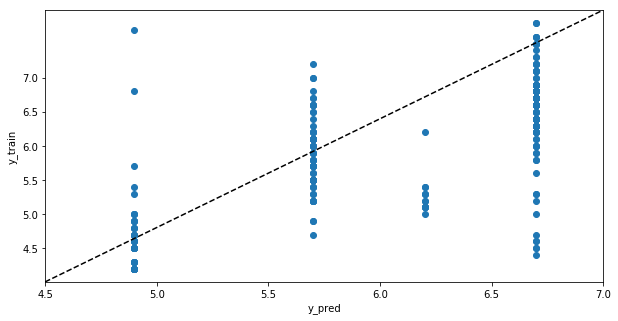

In [18]:
## Plot predictions
fig,ax = plt.subplots(figsize=(10,5))
plt.scatter(y_pred, y_train)
plt.plot([0, 1], [0, 1], '--k', transform = plt.gca().transAxes)
plt.xlabel('y_pred')
plt.ylabel('y_train')
plt.xticks([4.5, 5, 5.5, 6.0, 6.5, 7.0])
plt.yticks([4.5, 5, 5.5, 6.0, 6.5, 7.0])
plt.show()

In [25]:
## Calculate MSE
mean_squared_error(y_train, y_pred)

0.4769915254237289